In [1]:
%pylab inline
import seaborn, pickle

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open("tabs_spaces.pickle", "rb") as fin:
    data = dict(pickle.load(fin))

In [3]:
len(data)

398

In [4]:
data["C"]

{'bytes': 505365133777,
 'files': 38991563,
 'lines': 14118393339,
 'mixed': 331609597,
 'spaces': 5632754946,
 'tabs': 2279561513}

In [5]:
(data["C"]["mixed"] + data["C"]["spaces"] + data["C"]["tabs"]) / data["C"]["lines"]

0.583913895728302

In [6]:
dots = zeros((len(data), 3))
index = []
i = 0
for k, v in sorted(data.items()):
    dots[i] = [v["spaces"], v["tabs"], v["mixed"]]
    if sum(dots[i]) == 0:
        continue
    index.append(k)
    dots[i] /= sum(dots[i])
    i += 1

In [7]:
len(index)

395

In [8]:
lines = array([d["lines"] for d in data.values()])

In [9]:
lines.max(), lines.min(), mean(lines), mean(lines) / lines.max()

(61712272066, 1, 964892624.0100503, 0.015635344344121987)

In [10]:
from sklearn.manifold import TSNE
embedded = TSNE().fit_transform(dots)

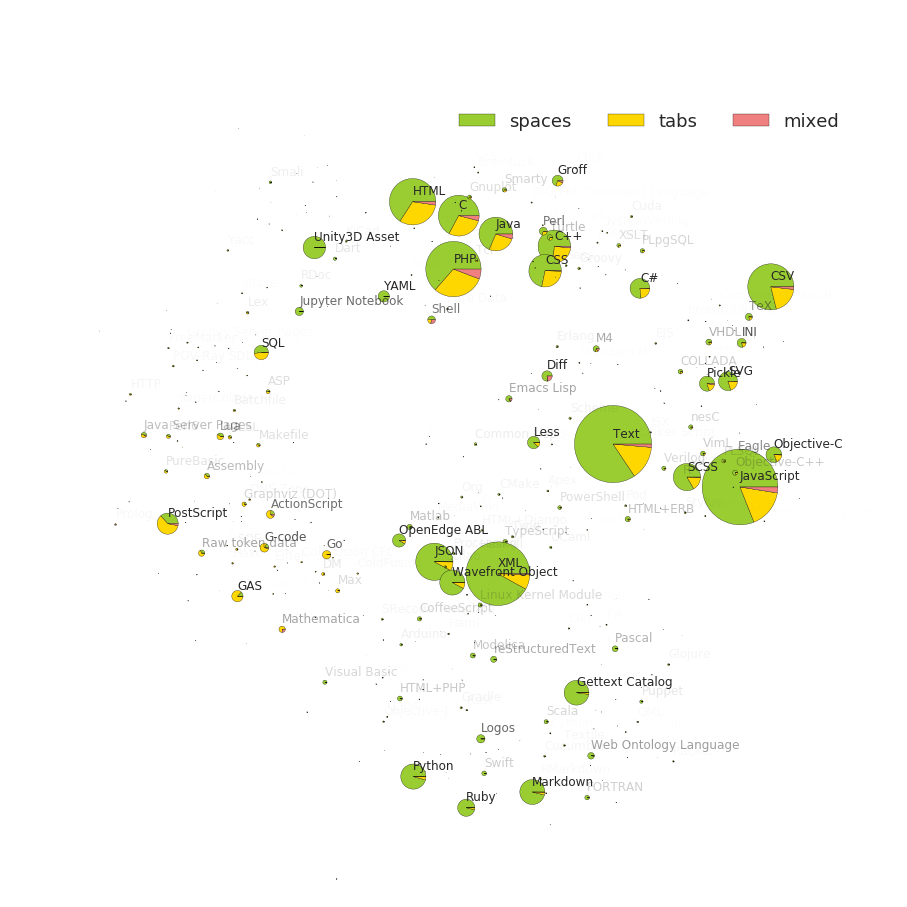

In [11]:
grid(False)
axis("off")
pylab.rcParams["savefig.facecolor"] = "white"
pylab.rcParams["figure.figsize"] = (16, 16)
rcParams["svg.fonttype"] = "none"
#scatter(embedded[:, 0], embedded[:, 1], s=[data[l]["lines"] / mean(lines) * 40 for l in index], c="lightblue")
for i, l in enumerate(index):
    patches, _ = pie(dots[i],
        center=(embedded[i, 0], embedded[i, 1]), radius=sqrt(data[l]["lines"] / mean(lines) * 0.3),
        colors=['yellowgreen', 'gold', 'lightcoral'])
    annotate(l, (embedded[i, 0], embedded[i, 1] + 0.75), alpha=min(data[l]["lines"] / mean(lines), 1))
xlim(-50, 50)
ylim(-50, 50)
legend(patches, ["spaces", "tabs", "mixed"], loc=1, fontsize=18, bbox_to_anchor=(0.95, 0.9), ncol=3)
savefig("tabs_spaces.svg", bbox_inches="tight")

In [12]:
import json
with open("tabs_spaces.json", "w") as fout:
    json.dump(data, fout, indent=2, sort_keys=True)

In [13]:
size = 0
count = 0
for l in index:
    d = data[l]
    count += d["files"]
    size += d["bytes"]

In [14]:
size / 1000000000000

20.16790309095

In [15]:
count / 1000000000

1.194284675